In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
from pylab import rcParams
from sklearn.model_selection import train_test_split as split
import warnings
import itertools
warnings.filterwarnings("ignore")
from IPython import display
from matplotlib import pyplot
import os
import re
import plotly.express as px
import warnings
from matplotlib.patches import Patch

In [ ]:
import os
fileList = os.listdir("/content/")
fileList

['.config',
 'TCEHY.csv',
 'NFLX.csv',
 'MSFT.csv',
 'NVDA.csv',
 'TSLA.csv',
 'AMZN.csv',
 'BIDU.csv',
 'GOOG.csv',
 'AAPL.csv',
 'INTC.csv',
 'sample_data']

In [ ]:
#companyName != "" and companyName !="sample_data"
companyList = []
for file in fileList:
    companyName = file.split(".")[0]
    if  companyName != "" and companyName !="sample_data":
        companyList.append(companyName)
print(companyList)

['TCEHY', 'NFLX', 'MSFT', 'NVDA', 'TSLA', 'AMZN', 'BIDU', 'GOOG', 'AAPL', 'INTC']


In [ ]:
import pandas as pd
# First, we get the data
stockList = ['AMZN', 'NVDA','AAPL','BIDU','GOOG','INTC','MSFT','NFLX','TCEHY','TSLA']
df_ = {}
for i in stockList:
    df_[i] = pd.read_csv("/content/" + i + ".csv", index_col = 'Date')

In [ ]:
from sklearn.model_selection import train_test_split
def split(dataframe, border, col):
    return dataframe.loc[:border,col], dataframe.loc[border:,col]

df_new = {}
for i in stockList:
    df_new[i] = {}
    # train / test split
    df_new[i]["Train"] = df_[i].query('Date <=  "2019-03-13"').reset_index(drop = False)
    df_new[i]["Test"]  = df_[i].query('Date >= "2019-03-13"').reset_index(drop = False)

In [ ]:
for i in stockList:
  df_new[i]["Train"].drop(columns=['Open', 'High','Low','Adj Close','Volume'],inplace = True)
  df_new[i]["Test"].drop(columns=['Open', 'High','Low','Adj Close','Volume'],inplace = True)

In [ ]:
df_new[i]["Train"]

,Date,Close
0,2012-01-03,1.872000
1,2012-01-04,1.847333
2,2012-01-05,1.808000
3,2012-01-06,1.794000
4,2012-01-09,1.816667
...,...,...
1804,2019-03-07,18.439333
1805,2019-03-08,18.942667
1806,2019-03-11,19.394667
1807,2019-03-12,18.890667


In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
# Scaling the training set
transform_train = {}
transform_test = {}
scaler = {}

for num, i in enumerate(stockList):
    sc = MinMaxScaler(feature_range=(0,1))
    a0 = np.array(df_new[i]["Train"]['Close'])
    a1 = np.array(df_new[i]["Test"]['Close'])
    a0 = a0.reshape(a0.shape[0],1)
    a1 = a1.reshape(a1.shape[0],1)
    transform_train[i] = sc.fit_transform(a0)
    transform_test[i] = sc.fit_transform(a1)
    scaler[i] = sc

del a0
del a1

In [ ]:
for i in transform_train.keys():
    print(i, transform_train[i].shape)
print("\n")
for i in transform_test.keys():
    print(i, transform_test[i].shape)

AMZN (1809, 1)
NVDA (1809, 1)
AAPL (1809, 1)
BIDU (1809, 1)
GOOG (1809, 1)
INTC (1809, 1)
MSFT (1809, 1)
NFLX (1809, 1)
TCEHY (1809, 1)
TSLA (1809, 1)


AMZN (453, 1)
NVDA (453, 1)
AAPL (453, 1)
BIDU (453, 1)
GOOG (453, 1)
INTC (453, 1)
MSFT (453, 1)
NFLX (453, 1)
TCEHY (453, 1)
TSLA (453, 1)


In [ ]:
trainset = {}
testset = {}
for j in stockList:
    trainset[j] = {}
    X_train = []
    y_train = []
    for i in range(10,1809):
        X_train.append(transform_train[j][i-10:i,0])
        y_train.append(transform_train[j][i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    trainset[j]["X"] = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
    trainset[j]["y"] = y_train

    testset[j] = {}
    X_test = []
    y_test = []
    for i in range(10, 453):
        X_test.append(transform_test[j][i-10:i,0])
        y_test.append(transform_test[j][i,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset[j]["X"] = np.reshape(X_test, (X_test.shape[0], X_train.shape[1], 1))
    testset[j]["y"] = y_test

In [ ]:
arr_buff = []
for i in stockList:
    buff = {}
    buff["X_train"] = trainset[i]["X"].shape
    buff["y_train"] = trainset[i]["y"].shape
    buff["X_test"] = testset[i]["X"].shape
    buff["y_test"] = testset[i]["y"].shape
    arr_buff.append(buff)

pd.DataFrame(arr_buff, index=stockList)

,X_train,y_train,X_test,y_test
AMZN,"(1799, 10, 1)","(1799,)","(443, 10, 1)","(443,)"
NVDA,"(1799, 10, 1)","(1799,)","(443, 10, 1)","(443,)"
AAPL,"(1799, 10, 1)","(1799,)","(443, 10, 1)","(443,)"
BIDU,"(1799, 10, 1)","(1799,)","(443, 10, 1)","(443,)"
GOOG,"(1799, 10, 1)","(1799,)","(443, 10, 1)","(443,)"
INTC,"(1799, 10, 1)","(1799,)","(443, 10, 1)","(443,)"
MSFT,"(1799, 10, 1)","(1799,)","(443, 10, 1)","(443,)"
NFLX,"(1799, 10, 1)","(1799,)","(443, 10, 1)","(443,)"
TCEHY,"(1799, 10, 1)","(1799,)","(443, 10, 1)","(443,)"
TSLA,"(1799, 10, 1)","(1799,)","(443, 10, 1)","(443,)"


In [ ]:
# tf.random.set_seed(1234)
# import tensorflow as tf
# from keras import backend as K
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras import layers
# class attention(Layer):
#     def __init__(self,**kwargs):
#         super(attention,self).__init__(**kwargs)

#     def build(self,input_shape):
#         self.W=self.add_weight(name='attention_weight', shape=(input_shape[-1],1),
#                                initializer='random_normal', trainable=True)
#         self.b=self.add_weight(name='attention_bias', shape=(input_shape[1],1),
#                                initializer='zeros', trainable=True)
#         super(attention, self).build(input_shape)

#     def call(self,x):
#         # Alignment scores. Pass them through tanh function
#         e = K.tanh(K.dot(x,self.W)+self.b)
#         # Remove dimension of size 1
#         e = K.squeeze(e, axis=-1)
#         # Compute the weights
#         alpha = K.softmax(e)
#         # Reshape to tensorFlow format
#         alpha = K.expand_dims(alpha, axis=-1)
#         # Compute the context vector
#         context = x * alpha
#         context = K.sum(context, axis=1)
#         return context

In [ ]:
from tensorflow.keras.models import Model


In [ ]:
time_steps = 10
n_features = 1
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input, Dense, LSTM, Conv1D, Dropout, Bidirectional, Multiply

def LSTMandCNN(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv1D(filters=256, kernel_size=1, activation='relu')(inputs)
    bi1 = LSTM(128, activation='relu', return_sequences=True)(x)
    max1d= tf.keras.layers.GlobalAveragePooling1D()(bi1)
    dropout = Dropout(0.2)(max1d)
    dense1=Dense(128)(dropout)
    dense2=Dense(64)(dense1)
    dense3=Dense(1)(dense2)
    model=Model([inputs],dense3)
    model.compile(loss='mse', optimizer='adam')
    return model

model = LSTMandCNN(input_shape=(time_steps,1))
model.summary()
model.compile(optimizer = 'adam',loss = 'mse')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 10, 256)           512       
                                                                 
 lstm (LSTM)                 (None, 10, 128)           197120    
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                             

In [ ]:
for i in stockList:
    print("Fitting to", i)
    history = model.fit(trainset[i]["X"], trainset[i]["y"], epochs=150, batch_size=32, validation_split=0.2)

Fitting to AMZN
Epoch 1/150
45/45 [==============================] - 5s 50ms/step - loss: 0.0046 - val_loss: 0.0020
Epoch 2/150
45/45 [==============================] - 1s 31ms/step - loss: 4.3966e-04 - val_loss: 0.0031
Epoch 3/150
45/45 [==============================] - 1s 31ms/step - loss: 3.9390e-04 - val_loss: 0.0015
Epoch 4/150
45/45 [==============================] - 1s 31ms/step - loss: 3.3771e-04 - val_loss: 0.0016
Epoch 5/150
45/45 [==============================] - 1s 30ms/step - loss: 3.2529e-04 - val_loss: 0.0015
Epoch 6/150
45/45 [==============================] - 1s 29ms/step - loss: 3.1123e-04 - val_loss: 0.0019
Epoch 7/150
45/45 [==============================] - 1s 30ms/step - loss: 2.9071e-04 - val_loss: 0.0014
Epoch 8/150
45/45 [==============================] - 2s 41ms/step - loss: 2.6917e-04 - val_loss: 0.0016
Epoch 9/150
45/45 [==============================] - 2s 46ms/step - loss: 2.9891e-04 - val_loss: 0.0023
Epoch 10/150
45/45 [==============================] 

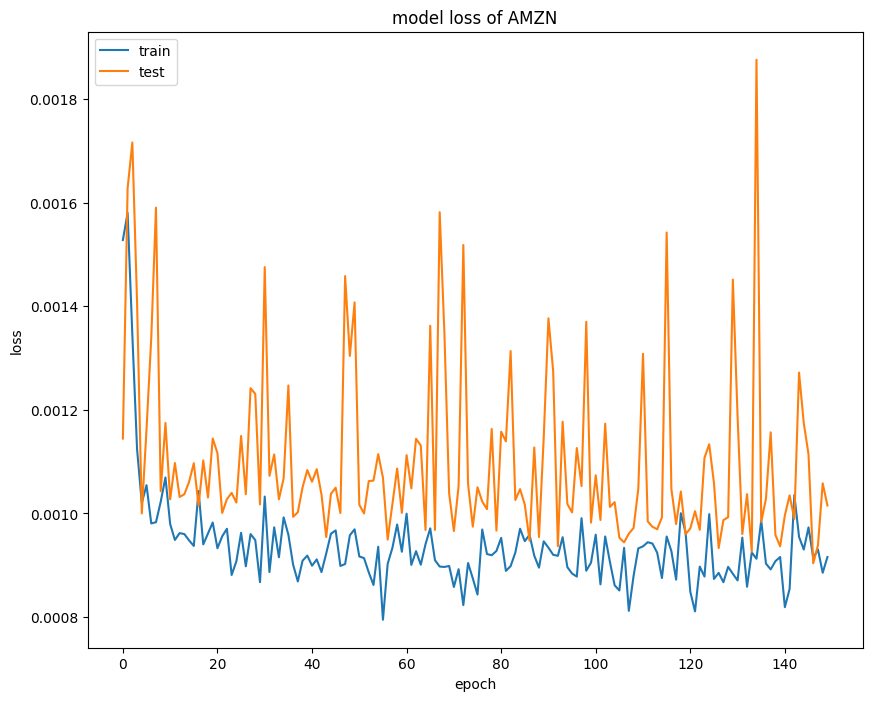

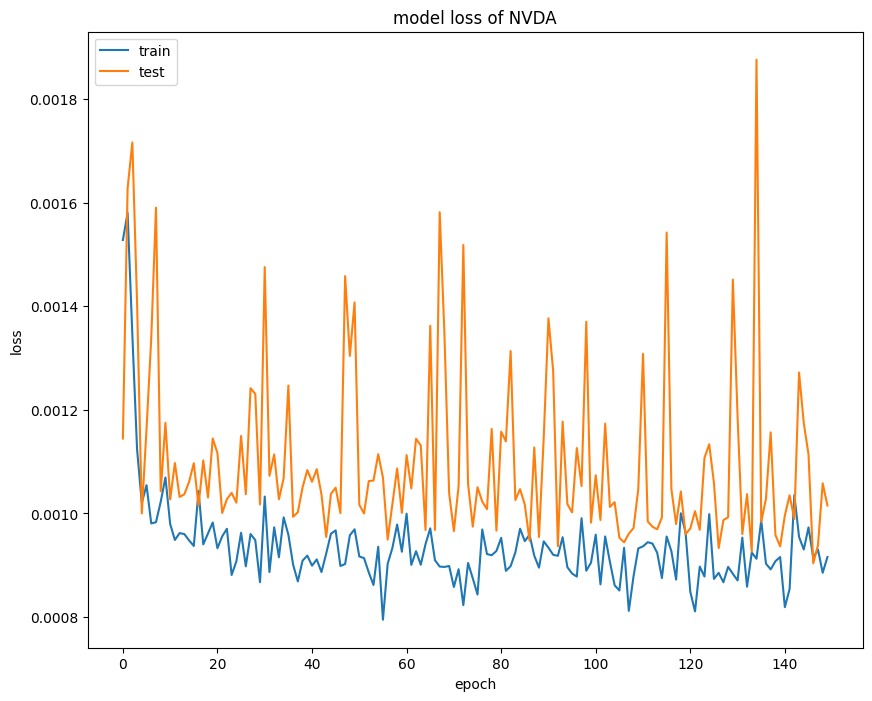

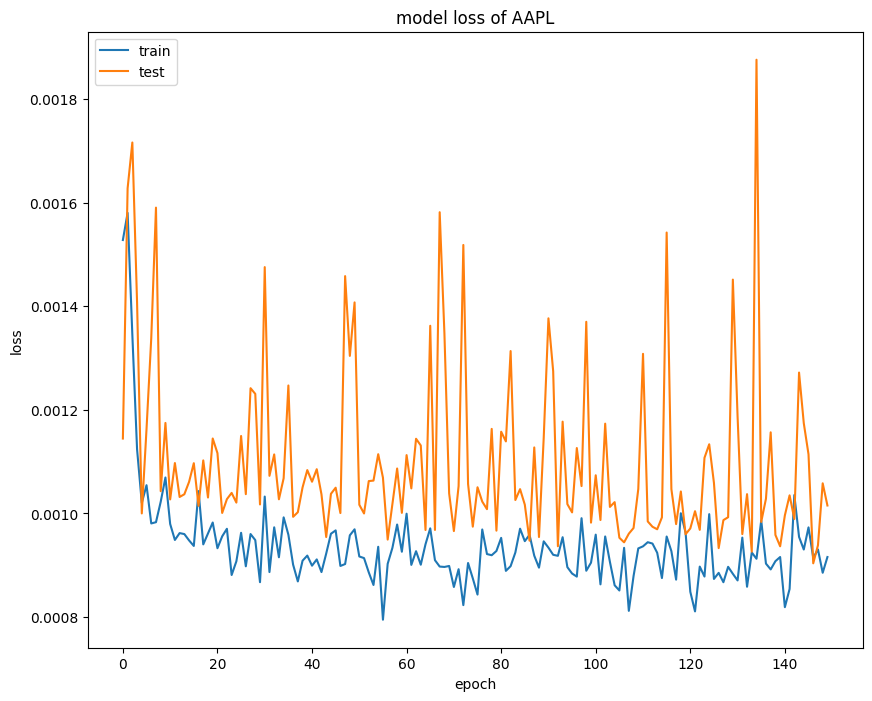

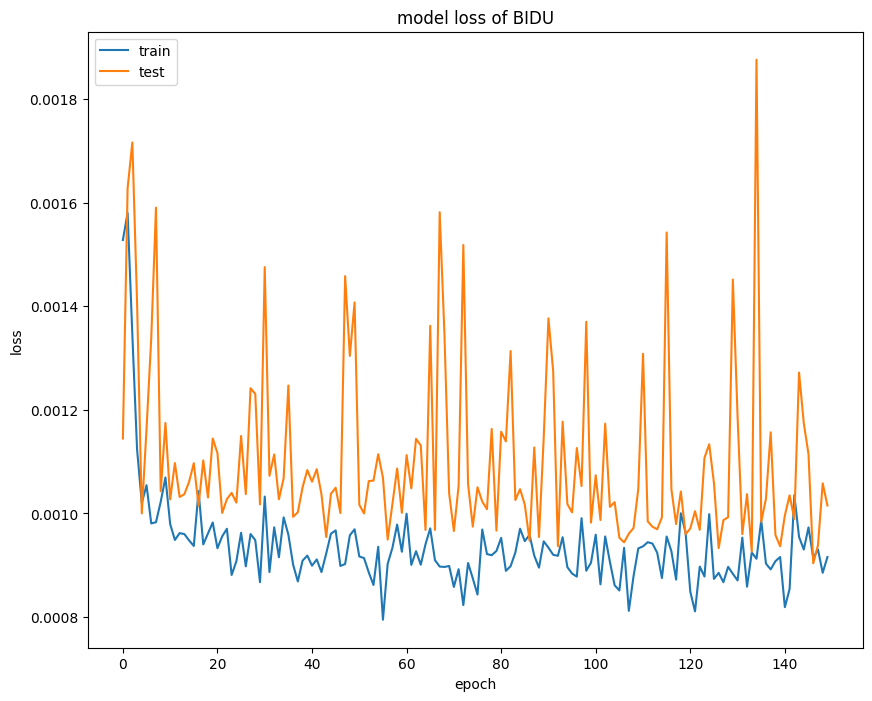

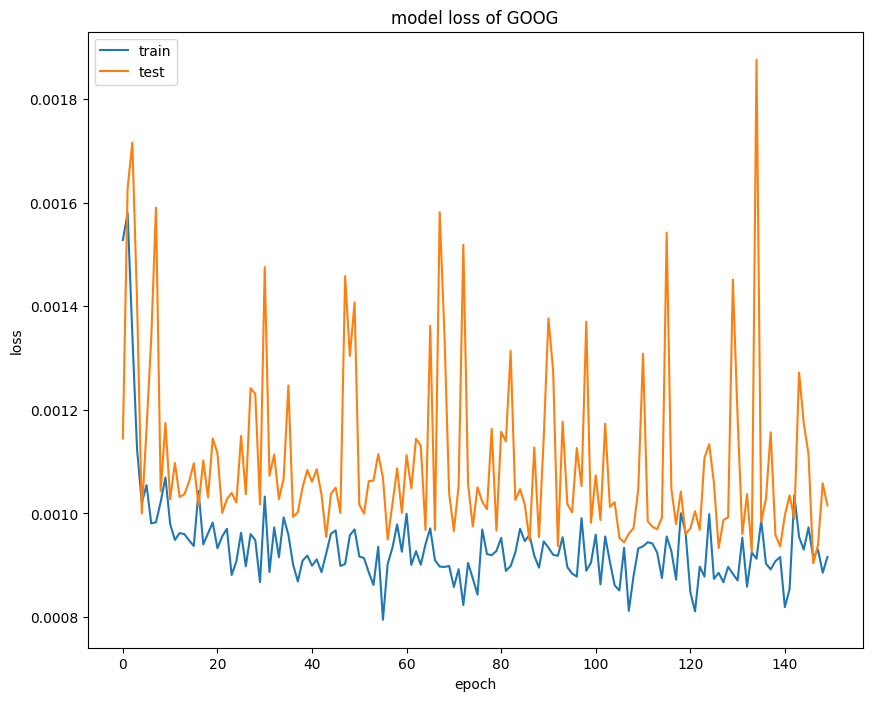

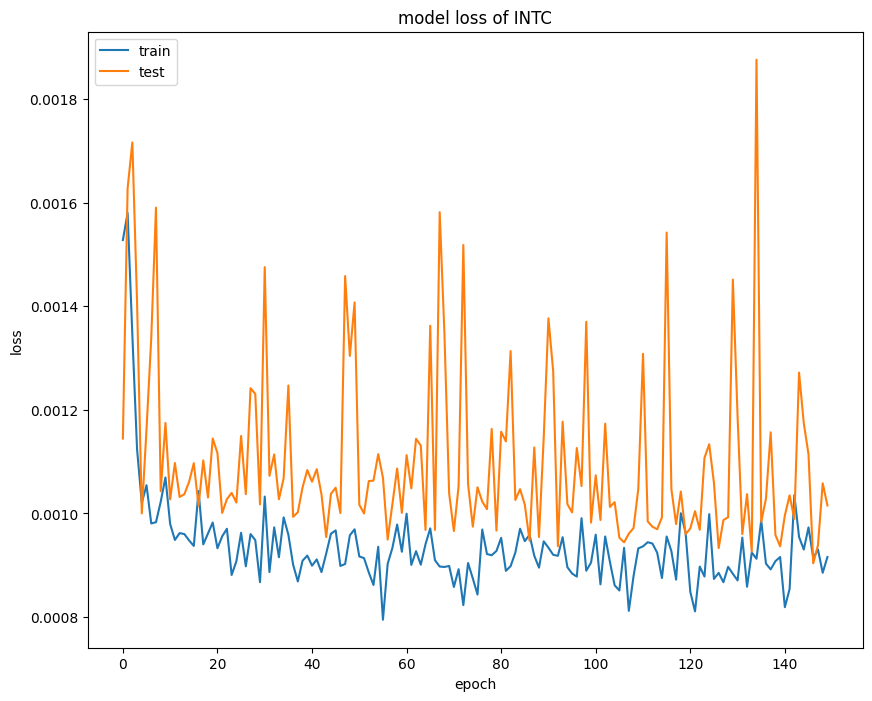

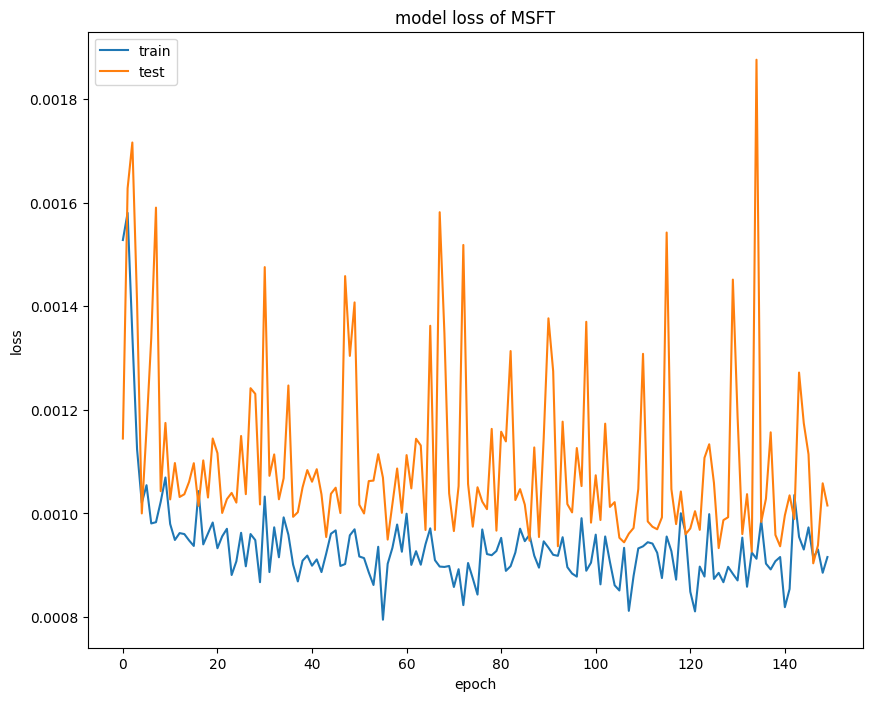

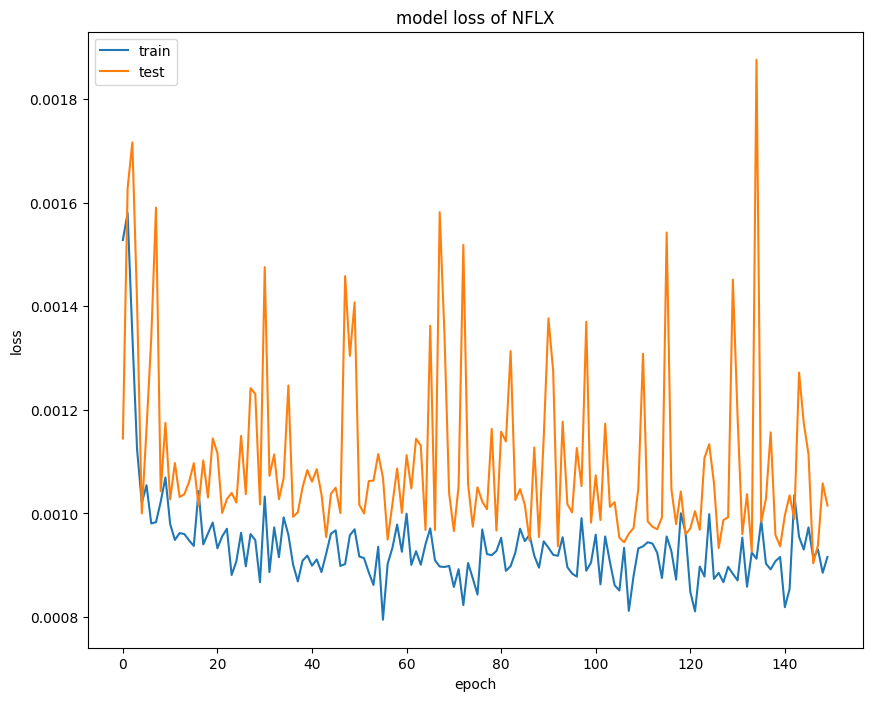

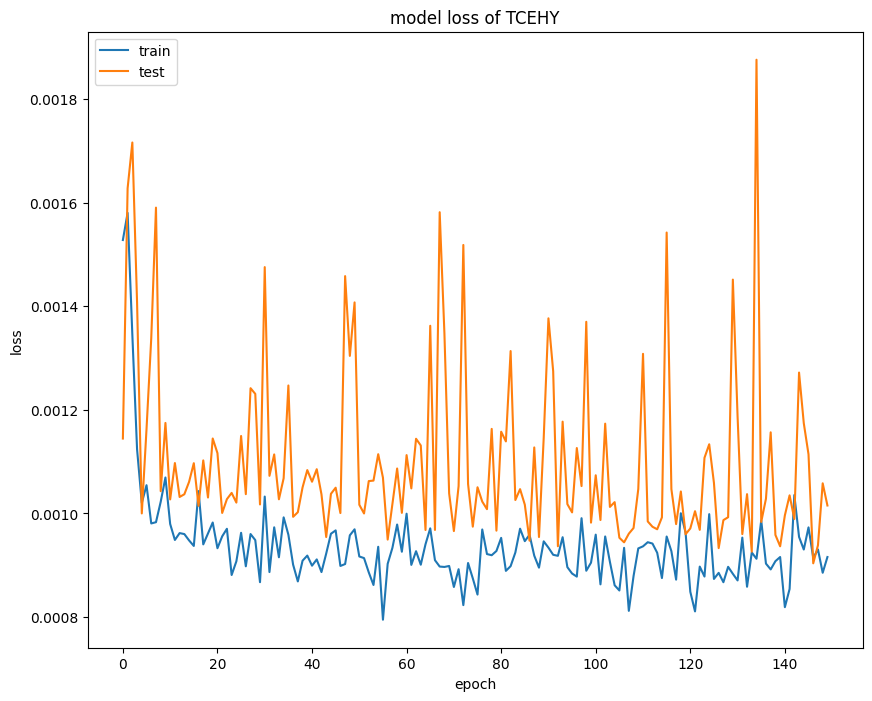

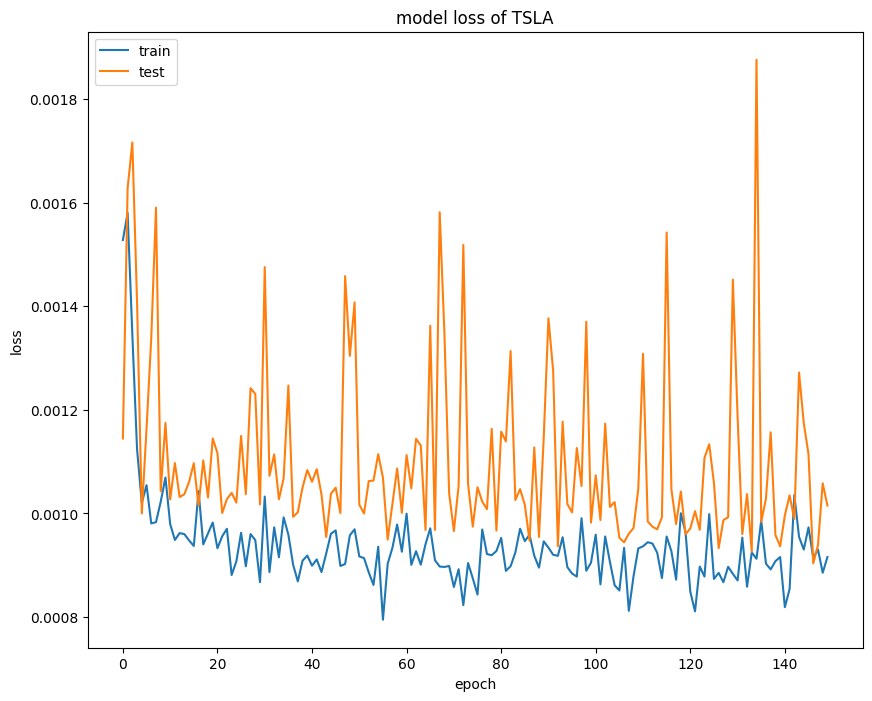

In [ ]:
for i in stockList:
  plt.rcParams['figure.figsize'] = (10,8)
  plt.plot(history.history['loss']) # tb
  plt.plot(history.history['val_loss'])
  plt.title('model loss of ' + i)
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

14/14 [==============================] - 0s 9ms/step


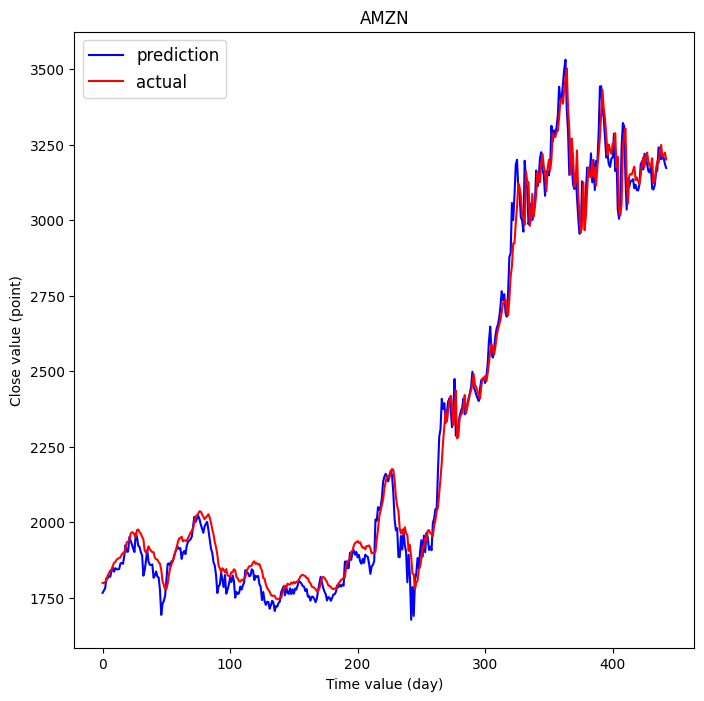

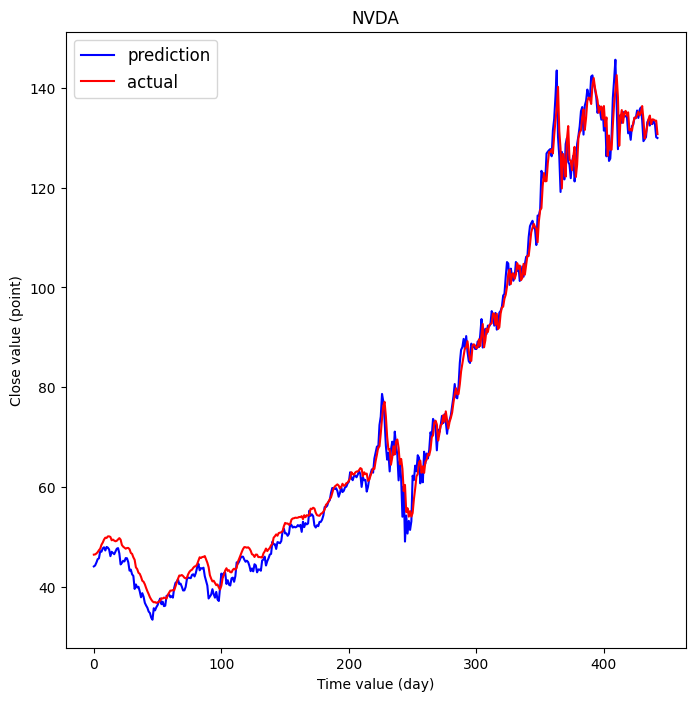

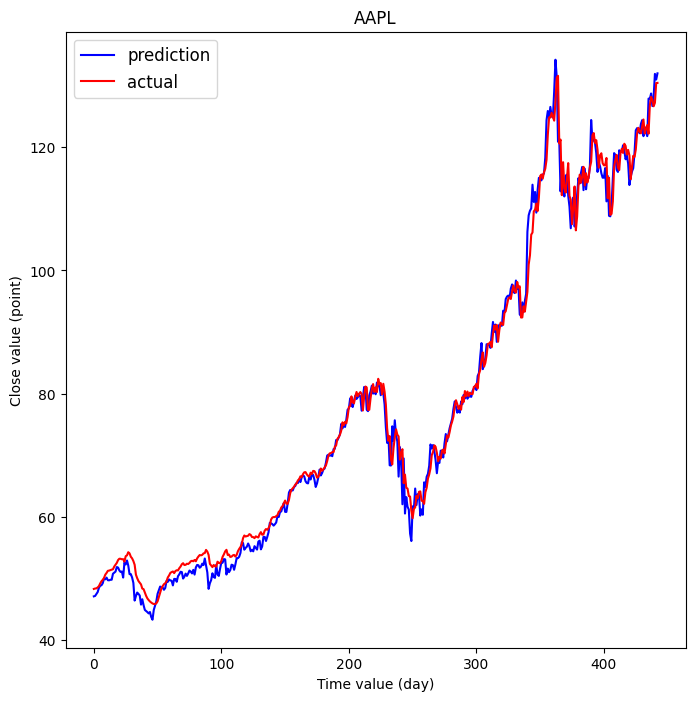

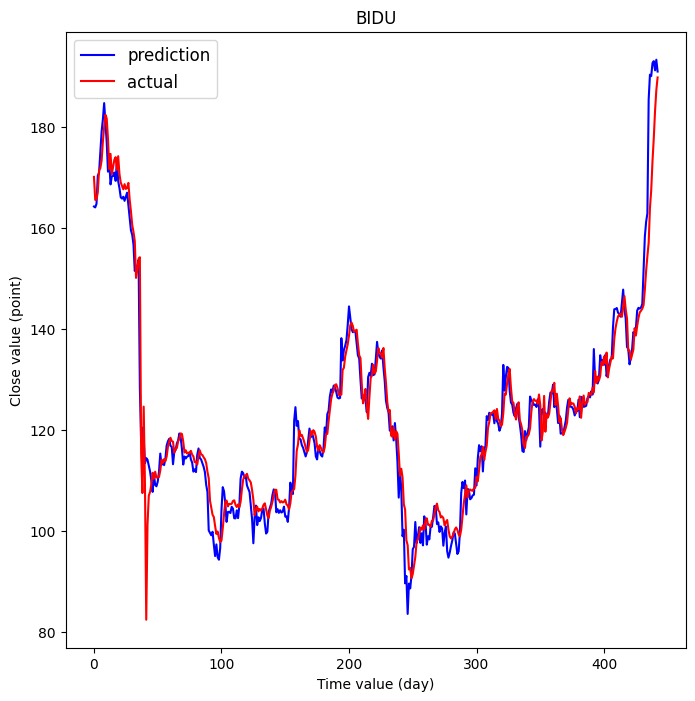

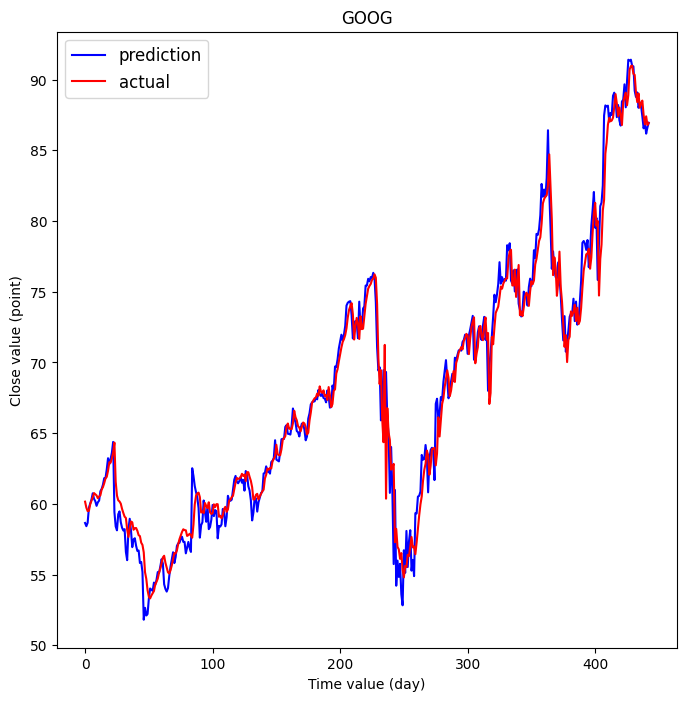

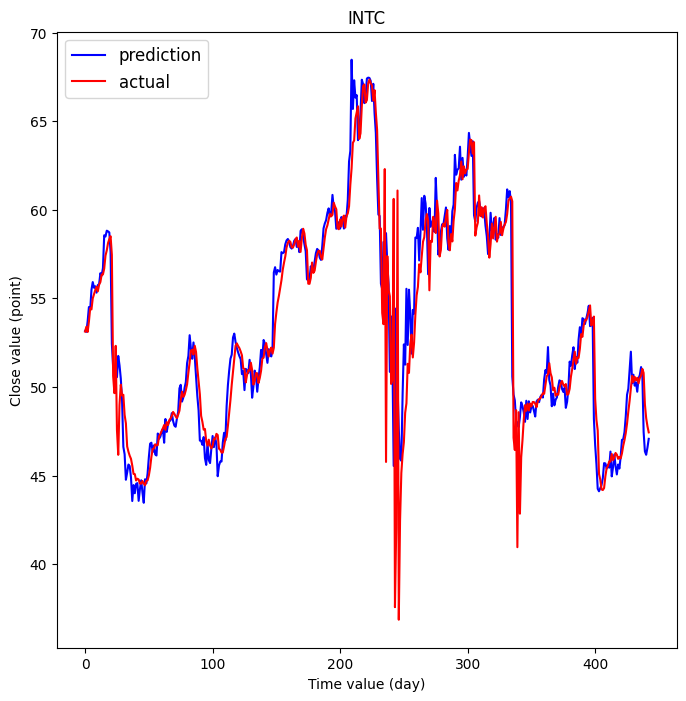

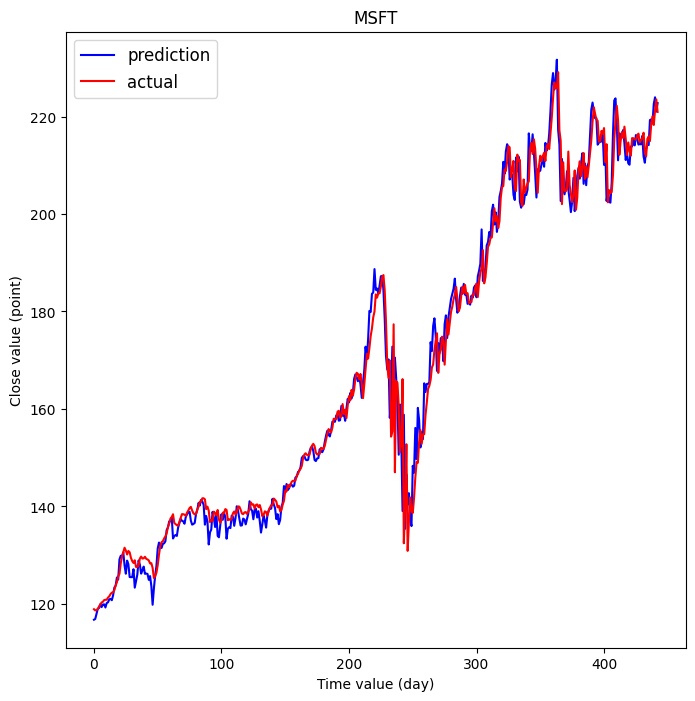

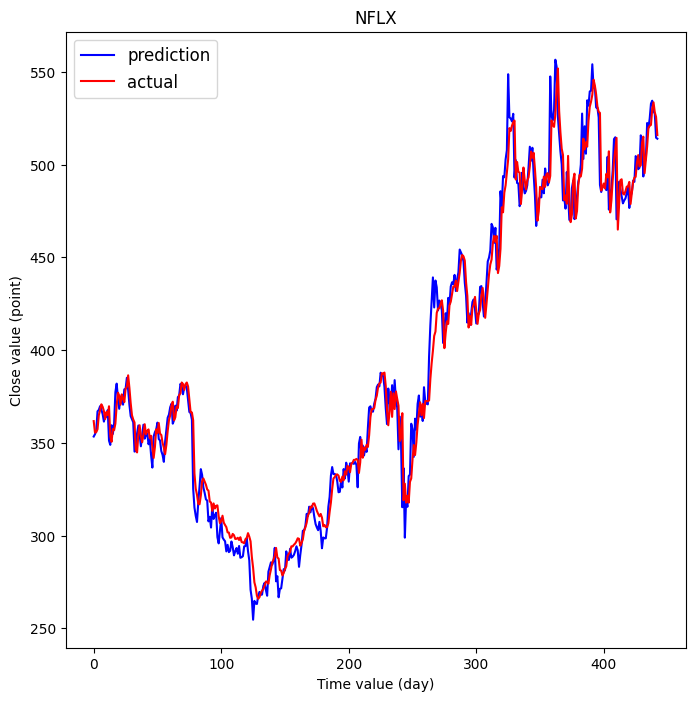

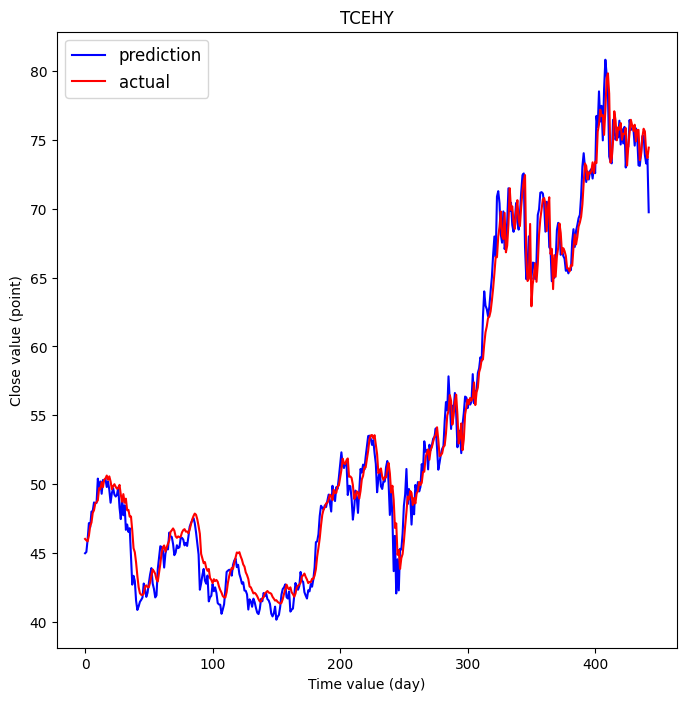

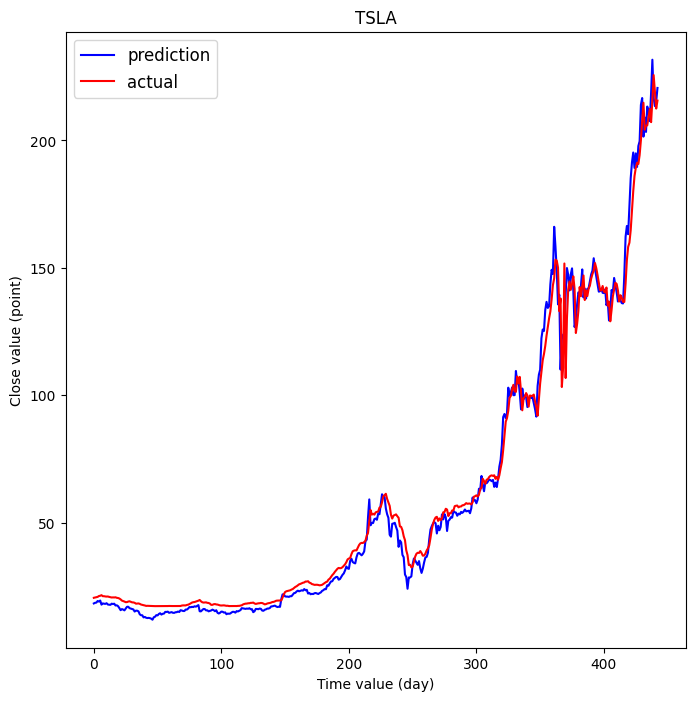

In [ ]:
pred_result = {}
for i in stockList:
    y_true = scaler[i].inverse_transform(testset[i]["y"].reshape(-1,1))
    y_pred = scaler[i].inverse_transform(model.predict(testset[i]["X"]))
    pred_result[i] = {}
    pred_result[i]["True"] = y_true
    pred_result[i]["Pred"] = y_pred
    plt.figure(figsize=(8,8))
    plt.title("{}".format(i))
    plt.plot(y_true, color = 'b')
    plt.plot(y_pred, color = 'r')
    plt.xlabel("Time value (day)")
    plt.ylabel("Close value (point)")
    plt.legend(('prediction', 'actual'),loc='upper left', fontsize=12)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
for i in stockList:
    true = testset[i]["y"].reshape(-1,1)
    pred = model.predict(testset[i]["X"])
    errors = mean_squared_error(true,pred)
    errors2 = mean_squared_error(true, pred, squared=False)
    errors3 = mean_absolute_error(true, pred)
    errors4 = mean_absolute_error(true, pred)*100
# report error
    print('Test errors of ' + i + ":")
    print('mean squared error : %.8f MSE' % (errors))
    print('root mean squared error : %.8f RMSE' % (errors2))
    print('mean absolute error: %.8f MAE' %(errors3))
    print('mean absolute percentage error: %.8f MAPE' %(errors4) + "\n")

14/14 [==============================] - 0s 10ms/step
Test errors of AMZN:
mean squared error : 0.00107264 MSE
root mean squared error : 0.03275116 RMSE
mean absolute error: 0.02475153 MAE
mean absolute percentage error: 2.47515312 MAPE

14/14 [==============================] - 0s 10ms/step
Test errors of NVDA:
mean squared error : 0.00062958 MSE
root mean squared error : 0.02509151 RMSE
mean absolute error: 0.01929336 MAE
mean absolute percentage error: 1.92933641 MAPE

14/14 [==============================] - 0s 10ms/step
Test errors of AAPL:
mean squared error : 0.00064938 MSE
root mean squared error : 0.02548301 RMSE
mean absolute error: 0.01826860 MAE
mean absolute percentage error: 1.82685959 MAPE

14/14 [==============================] - 0s 9ms/step
Test errors of BIDU:
mean squared error : 0.00186460 MSE
root mean squared error : 0.04318100 RMSE
mean absolute error: 0.02711263 MAE
mean absolute percentage error: 2.71126275 MAPE

14/14 [==============================] - 0s 10ms/

In [ ]:
df_new1 = {}
for i in stockList:
    df_new1[i] = {}
    df_new1[i]["Test"]  = df_[i].query('Date >= "2019-03-27"').reset_index(drop = False)

In [ ]:
for i in stockList:
  y_pred = scaler[i].inverse_transform(model.predict(testset[i]["X"]))
  df_new1[i]["Test"].drop(columns=['Open', 'High','Low','Adj Close','Volume'],inplace = True)
  df_new1[i]["Test"].insert(2,"Predicted", y_pred)

14/14 [==============================] - 0s 8ms/step


In [ ]:
df_new1[i]["Test"]

,Date,Close,Predicted
0,2019-03-27,18.322001,20.534433
1,2019-03-28,18.574667,20.631149
2,2019-03-29,18.657333,20.768822
3,2019-04-01,19.278667,20.903257
4,2019-04-02,19.058666,21.222857
...,...,...,...
438,2020-12-18,231.666672,215.769867
439,2020-12-21,216.619995,225.636246
440,2020-12-22,213.446671,218.887863
441,2020-12-23,215.326660,212.501511


In [ ]:
for i in stockList:
  # y_true = scaler[i].inverse_transform(testset[i]["y"].reshape(-1,1))
  # y_pred = scaler[i].inverse_transform(model.predict(testset[i]["X"]))
  df_pred = pd.DataFrame(data = df_new1[i]["Test"])
  df_pred.to_csv(i + "_output.csv")